# CetusID - Dolphin Sounds Detection and Taxonomic Identification for Passive Acoustic Monitoring


Notebook accompanying the paper titled "Automatic Detection and Taxonomic Identification of Dolphin Vocalizations using Convolutional Neural Networks for Passive Acoustic Monitoring" by Guilherme Frainer*, Emmanuel Dufourq, Jack Fearey, Sasha Dines, Rachel Probert, Simon Elwen and Tess Gridley.

*Corresponding author: gui.frainer@gmail.com / [Centre for Statistics in Ecology, Environment and Conservation](https://science.uct.ac.za/seec), University of Cape Town, South Africa and [Sea Search Research and Conservation](http://seasearch.co.za/), South Africa.



# Download certain Python libraries

**Instructions:**

1. Make sure that you have selected a GPU instance (Click on Runtime, and select Change runtime type, then select 'GPU' under hardware accelerator -- GPU type = T4);
2. Below we provide the code to download necessary Python libraries;
3. After running the cell below, please restart the kernel (Click on Runtime, and select restart runtime);
4. Once the kernel has restarted, you don't need to run the following cell again.

In [2]:
!pip install keyboard
!pip install librosa==0.8.1
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


## Import Python libraries

In [4]:
from google.colab import drive
import gdown
import librosa
import os
import sys

# Download the data

**Instructions**:

1. When you run the cell below, a message will appear on your screen stating "allow this notebook to access your Google credentials". Click on Allow. Next, a popup window will appear, allowing you to sign into your Google account. The window will refresh, scroll down and click on "allow". The popup should then close;
2. This cell will download data from a Google Drive folder and takes approximately 2 minutes and 30 seconds to run;
3.   Note that this will not download files to your personal computer;
4. If the download was successful, you will see "Download completed" at the bottom of the cell.



In [ ]:
drive.mount('/content/drive', force_remount=True)
!gdown --folder --no-cookies "https://drive.google.com/drive/folders/1HOb0GxXAGoHWDqkQhwRWvcaYh1R21s89"

Mounted at /content/drive
Retrieving folder list
Retrieving folder 1YQg2DwtJKhBtSGLR-ItceeeuWmVdFKBq __pycache__
Processing file 1-hIbXraSvMnORzkX2n_PZOYiCszLm3YC Build_CetusID.cpython-310.pyc
Processing file 1-aq_cGYijTeSpK_5jI8atoxfwfZ8m5sX CNN_networks.cpython-310.pyc
Processing file 1-IcVezhBl9I4_N-1yw7dvGbIvZc1Xe8g Extract_Augment.cpython-310.pyc
Processing file 1-_tDEngkZ3pp15j0vs_l3ppQZGeVCNn- Initialization.cpython-310.pyc
Processing file 1-QmDCmY0AYbmczHaAzH-KBD8Qaz--KK6 Initialize_prediction.cpython-310.pyc
Processing file 1-eSTFpVTNzMGRCYUkxJkFJBCeTNn5xJ3 Predict.cpython-310.pyc
Processing file 1-uSylPJSYJUj6tnt_lBwBXiHWh1HYEbv Prediction_load.cpython-310.pyc
Processing file 1-q9JM_cQH5UJSYYbjWveeMfrTmbt1fdW Augmentation_load.py
Processing file 1LaTlrg3XRWYS-WmfH2UW6228XzfoUCgT Build_CetusID.py
Processing file 1i79S2fNNm56H9pCSpGUzMkj7lgo4C3VE CNN_networks.py
Retrieving folder 1-QPU0rECA2pQGYwbwJFBPOPstRfSo2JD Data
Retrieving folder 1-SMXk-5X-AjVmVa56aVwBlt_AwQgPtNi Soundsca

# User parameters

**Instructions**

1. Set the path for the main folder (for Colab demo enter this: **/content/CetusID**);
2. Choose if you wish to validate your model with distinct files or randomly splitting the dataset during training (e.g., **1**);
3. Enter the sample rate in kilohertz (e.g., **96**);
4. Enter the length of the window size in seconds (e.g., **2**);
5. Enter the dpi for the images (e.g., **90**).

The algorithm builds the structured folders that the data is organized. Each notebook is set to run independently. However, one might need to run previous modules for some functions such as the Augmentation step, which deletes the extracted audios. In this case, the Extraction notebook needs to run again.

In [6]:
roots_CetusID = input("Enter the path to CetusID folder: ")
sys.path.append(roots_CetusID)
from Build_CetusID import *
initialize(roots_CetusID)
print('Done')

Enter the path to CetusID folder: /content/drive/MyDrive/CetusID
Do you want to validate your model (0) with distinct files or (1) splitting your training dataset?:       [0/1]1
Enter the sample rate used for the recordings in kilohertz (kHz) : 96
Enter the time to extract the sounds in seconds (s) (i.e., window size): 2
Enter the resolution of the images in dpi: 90

CetusID set. Move your training files accordingly.
Done


#Extract the audio segments from the annotated data

This notebook uses a sliding window approach to extract segments of sound with equal length (user defined hyper-parameter) from the annotated events, in which segments were sampled in series based on their start and end times. The segment start times were interspaced one second each other to sample dolphin vocalisations in different contexts.

Note:
* This cell takes less than 5 seconds to execute.





In [21]:
from Extract_Augment import *
from Initialization import *
extract(species_dir,soundscape_dir,species_dir_val,soundscape_dir_val,
                            sample_rate, time_to_extract, augmentation_probability,
                            augmentation_amount, seed, number_iterations,decision_val,dpi,roots_CetusID)
print('Done')

~ CetusID ~


Preparing training files: ...
Training files written.


----------------------------------
Extracting audio data of Sousa_plumbea

Reading file: 002_160517143201_02_FB_mono_test.wav
Reading audio file (this can take some time)...

Reading done.
file:  /002_160517143201_02_FB_mono_test.wav

Extracted audio shape: (10, 192000)

Extracting segments done. Pickle files saved.

Reading file: 003_160623111100_01_FB_mono_test.wav
Reading audio file (this can take some time)...

Reading done.
file:  /003_160623111100_01_FB_mono_test.wav

Extracted audio shape: (13, 192000)

Extracting segments done. Pickle files saved.

Reading file: 210328094243_01_MB_mono_CUTTEST.wav
Reading audio file (this can take some time)...

Reading done.
file:  /210328094243_01_MB_mono_CUTTEST.wav

Extracted audio shape: (23, 192000)

Extracting segments done. Pickle files saved.

----------------------------------
Extracting audio data of Delphinus_delphis

Reading file: 11_20170428_01_DC_0012_mono_test

#Augmentation

This notebook augment the dataset by randomly mixing dolphin sounds with target soundscapes from where the classifier would be applied; in our case, Mossel Bay. The new segments contained a proportion of both dolphin (90%) and soundscape (10%) sound to elucidate a potential detection of species in the target area. The amount of augmentation for species was scaled up relative to the number of segments generated for the species with the largest amount of data, which was only duplicated due to the large number of clips generated (i.e., D. delphis, with 20,319 clips generated and 40,638 spectrograms created). Class distribution was always balanced after the augmentation process, based on the class with the smallest dataset.

Note:
* This cell takes approximately 1 minute and 20 seconds to execute.

In [22]:
from Augmentation_load import *
augment(species_dir,soundscape_dir,
                            sample_rate, time_to_extract, augmentation_probability,
                            augmentation_amount, seed, number_iterations,decision_val,dpi,max_class_samples)
print('Done')

Loading soundscape data:

----------------------------------
Extracting audio data from MOORING1

Reading file: 5351.210321001004.wav
Reading audio file (this can take some time)...

Reading done.
file:  /5351.210321001004.wav

Extracted audio shape: (217, 192000)

Extracting segments done. Pickle files saved.

----------------------------------
Soundscape shape: (217, 192000)
----------------------------------

----------------------------------
Augmenting data of Sousa_plumbea

Reading file: 002_160517143201_02_FB_mono_test.wav

Reading file: 003_160623111100_01_FB_mono_test.wav

Reading file: 210328094243_01_MB_mono_CUTTEST.wav
46
23

Reading file: 002_160517143201_02_FB_mono_test.wav

extracted: (10, 192000)

extracted_augmented: (10, 192000)

Reading file: 003_160623111100_01_FB_mono_test.wav

extracted: (13, 192000)

extracted_augmented: (7, 192000)

Reading file: 210328094243_01_MB_mono_CUTTEST.wav

extracted: (23, 192000)

extracted_augmented: (10, 192000)
..~.....~.....~...|||

#Training Convolutional Neural Networks models

The first model (CNN1) was designed as a binary classifier to detect the presence or absence of dolphin sounds.

Note:
* CNN1 takes approximately 40 seconds to train.


Loading data for the first Convolutional Neural Network (CNN-1): Dolphin detection

Dolphin data files by species:

 Sousa_plumbea 
002_160517143201_02_FB_mono_test.wav
003_160623111100_01_FB_mono_test.wav
210328094243_01_MB_mono_CUTTEST.wav

 Delphinus_delphis 
11_20170428_01_DC_0012_mono_test.wav
31_202158126_210125110259_96SR_CUT.wav
41_PLT_130309_CDE1_10TEST2.wav

 Tursiops_aduncus 
09_20170531_05_TA_0009_96SR_CUT.wav
11_210322094834_01_MB_1ch_test.wav
45_PLT_140309_E4_04TEST.wav

...............................................
Non-dolphin data files by place:

 MOORING1 
5351.210321001004.wav

...............................................
Data loaded. 
...............................................
...............................................
Summary:

Dolphin data: (86, 450, 450, 1)
Nondolphin data: (86, 450, 450, 1)


...............................................
Processing data for CNN-1...
Processing done.
...............................................
...............

<Figure size 640x480 with 0 Axes>

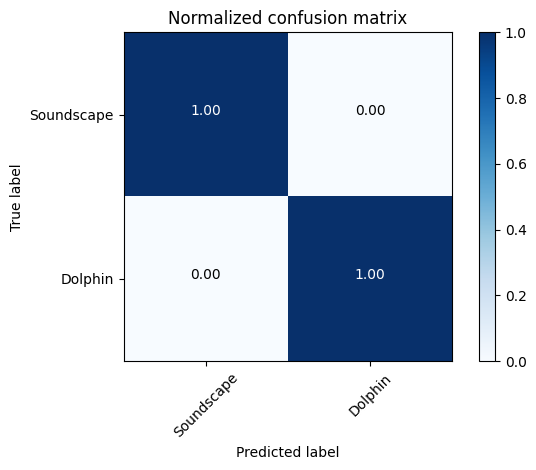

In [23]:
from Load_Train_CNN1 import *
from Load_Train_CNN2 import *
from CNN_networks import *
train_model_CNN1(1, species_dir, soundscape_dir,species_dir_val,soundscape_dir_val,network_CNN1, plot_confusion_matrix,decision_val,location_models,prediction_folder)
print('Done')

The second model (CNN2) was a multi-class classifier that could differentiate between different species of dolphins in case of positive detection.

Note:
* CNN1 takes approximately 15 seconds to train.


...............................................
Processing data for CNN-2...
Loading data for the second Convolutional Neural Network (CNN-2): Species identification
Balancing the TRAINING data with the smallest class

Training dataset will be balanced to 27 samples per species

Dolphin data files by species:

 Sousa_plumbea 
002_160517143201_02_FB_mono_test.wav
003_160623111100_01_FB_mono_test.wav
210328094243_01_MB_mono_CUTTEST.wav

Unbalanced Sousa_plumbea data shape:  (27, 450, 450, 1)
Balanced Sousa_plumbea data shape:  (27, 450, 450, 1)

 Delphinus_delphis 
11_20170428_01_DC_0012_mono_test.wav
31_202158126_210125110259_96SR_CUT.wav
41_PLT_130309_CDE1_10TEST2.wav

Unbalanced Delphinus_delphis data shape:  (31, 450, 450, 1)
Balanced Delphinus_delphis data shape:  (27, 450, 450, 1)

 Tursiops_aduncus 
09_20170531_05_TA_0009_96SR_CUT.wav
11_210322094834_01_MB_1ch_test.wav
45_PLT_140309_E4_04TEST.wav

Unbalanced Tursiops_aduncus data shape:  (28, 450, 450, 1)
Balanced Tursiops_aduncu

<Figure size 640x480 with 0 Axes>

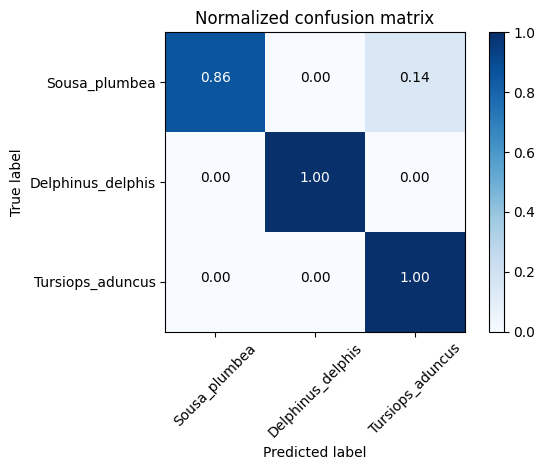

In [24]:
train_model_CNN2(1, species_dir,species_dir_val,network_CNN2, plot_confusion_matrix, decision_val,location_models,prediction_folder)
print('Done')

#Inference notebook

The CNN1 was applied to unseen PAM recordings to obtain softmax values indicating the likelihood of dolphin vocalisations within each testing segment. A post-processing technique was devised to group segments that were predicted as present and occurred within a 900 second timeframe of each other, and for which the model displayed a high degree of confidence (> 70%). The outcome of CNN1 determined the start and end times for each passive acoustic encounter (PAE). Each PAE was then assessed using CNN2 to assign a single species identification for all detected segments containing dolphin vocalisations. The taxonomic identification for a PAE was determined by first using CNN2 to determine the species indications on each detected segment within the PAE, and then the majority taxonomic identification was assigned to the entire PAE.

**Instructions**

Run the cell and follow the steps below:

1. Select the type of recorder you have used (in this case, Soundtrap **1**);
2. Insert the number of the CNN1 model (e.g., **768001** - from the paper);
3. Insert the number of the CNN2 model (e.g., **249370** - from the paper);
4. Enter the length of the audio files to be predicted in minutes  (e.g., **2**);
5. Enter the time between encounters (e.g., **15**).

Notes:
* Please, use the settings shown in the examples and the weights provided from the paper (CNN1: **768001**, CNN2: **249370**);
* This inference takes approximately 2 minutes;
* The correspondent script for the Prediction notebook is always called "Predict.py" for customised CNN1 and CNN2. To use Transfer Learning, the correspondent script should be renamed as "Predict.py".

In [20]:
from Extract_Augment import convert_to_spectrograms, build_training_files_list, execute_listing_folders
from Predict import *
from Initialize_prediction import *
set_prediction(roots_CetusID,testing_folder)
from Prediction_load import *
execute_processing(testing_folder,sample_rate, location_models, weights_name_CNN1, weights_name_CNN2,
                   time_to_extract, prediction_folder, convert_to_spectrograms, build_training_files_list,
                   execute_listing_folders,batch_number,network_CNN1, network_CNN2,network_CNN1_TF, network_CNN2_TF,species_dir,dpi,real_start_time,time_within_detections, verbose = True)
print('Done')

Please, enter your recorder device type (0 - Hydromoth/Audiomoth; 1 - Soundtrap):       [0/1]1
Soundtrap

Deployment starting at 2021-03-21 19:20:03
Enter the model number for the CNN1: 768001
Enter the model number for the CNN2: 249370
Enter the length of the audio file in minutes: 2
Enter the length of the acoustic encounter in minutes: 15
~ CetusID ~

Starting predicting PAM files...


Reading file: 5351.210321192003.wav
checking end index 60
Processing batch: 0 out of 2
2/2 [==============================] - 0s 15ms/step
Processing batch: 1 out of 2
2/2 [==============================] - 0s 15ms/step

Reading file: 5351.210321192005.wav
checking end index 60
Processing batch: 0 out of 2
2/2 [==============================] - 0s 18ms/step
Processing batch: 1 out of 2
2/2 [==============================] - 0s 21ms/step
 ~ Post-Processing ~

Acoustic Encounter 1:

Number of detections: 6
Encounter duration: 0:02:52
Start time: 2021-03-21 19:20:41
End time: 2021-03-21 19:23:33

Proport